# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
import random
import copy
from collections import namedtuple, deque
from replay_buffer import ReplayBuffer

import tensorflow as tf
from keras import backend as K
from keras.layers import Dense, Input, Add, Activation,LeakyReLU
from keras.layers import GaussianNoise, Dropout, Concatenate
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

from Sup_ddpg_agent import Agent
from BFSWorld import BFSWorldEnv
from infoCalc import *

Using TensorFlow backend.


### 2. Instantiate the Environment and Agent

In [2]:
sess = tf.Session()
K.set_session(sess)

env = BFSWorldEnv()
env.seed(10)
print(env.action_space.shape[0])
agent = Agent(env, sess,state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
#agent.NetworkSummary()
#agent.load_network('savedModels/', 'saved.h5')

4
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

cut reward 9.35275193763963
9.35275193763963
cut reward -50.43605709333043
-50.43605709333043
-1
-1
cut reward -4.991775364436009
-4.991775364436009
cut reward 198.01492720400856
198.01492720400856
-1
-1
cut reward 7.037647268109408
7.037647268109408
cut reward 8.82960634208258
8.82960634208258
-1
-1
cut reward -7.407897090707378
-7.407897090707378
-1
-1
Episode 1	Average Score: 152.40	Score: 152.40cut reward 9.024898763948245
9.024898763948245
cut reward 4.492255998493904
4.492255998493904
cut reward -50.43605709333043
-50.43605709333043
-1
-1
cut reward 53.01098363090396
53.01098363090396
-1
-1
cut reward 33.616620334812886
33.616620334812886
-1
-1
Episode 2	Average Score: 98.05	Score: 43.71cut reward 9.35275193763963
9.35275193763963
-1
cut reward 1.0100482125152732
1.0100482125152732
cut reward 46.12317634192315
46.12317634192315
cut reward -71.2424410217527
-71.2424410217527
-1
-1
-1
cut reward 33.616620334812886
33.616620334812886
-1
-1
Episode 3	Average Score: 69.66	Score: 12.86

cut reward 31.331120798756555
31.331120798756555
-1
-1
Episode 24	Average Score: 65.67	Score: 200.73cut reward 9.024898763948245
9.024898763948245
cut reward -6.554706281861606
-6.554706281861606
< thresh reward  -7.49606192484562 0.350393807515438
-7.49606192484562
cut reward 6.551658400421882
6.551658400421882
-1
cut reward 8.82960634208258
8.82960634208258
-1
-1
cut reward 33.616620334812886
33.616620334812886
-1
-1
Episode 25	Average Score: 64.60	Score: 38.97cut reward 9.35275193763963
9.35275193763963
-1
cut reward -4.991775364436009
-4.991775364436009
cut reward 198.01492720400856
198.01492720400856
-1
-1
cut reward 7.037647268109408
7.037647268109408
cut reward 8.82960634208258
8.82960634208258
-1
-1
cut reward -7.407897090707378
-7.407897090707378
-1
-1
Episode 26	Average Score: 69.95	Score: 203.84cut reward 9.35275193763963
9.35275193763963
-1
cut reward 1.0100482125152732
1.0100482125152732
cut reward 46.12317634192315
46.12317634192315
cut reward -71.2424410217527
-71.242441

cut reward -53.136912194295114
-53.136912194295114
-1
-1
Episode 45	Average Score: 63.61	Score: 84.59cut reward 9.35275193763963
9.35275193763963
cut reward -50.43605709333043
-50.43605709333043
-1
-1
cut reward -4.991775364436009
-4.991775364436009
cut reward 198.01492720400856
198.01492720400856
-1
-1
cut reward 0.18530493216456945
0.18530493216456945
cut reward 1.0100482125152732
1.0100482125152732
-1
-1
cut reward 31.331120798756555
31.331120798756555
-1
-1
Episode 46	Average Score: 66.06	Score: 176.47cut reward 9.35275193763963
9.35275193763963
-1
cut reward 1.0100482125152732
1.0100482125152732
cut reward 46.12317634192315
46.12317634192315
-1
-1
cut reward 33.616620334812886
33.616620334812886
cut reward 23.892772846683677
23.892772846683677
-1
-1
-1
Episode 47	Average Score: 66.95	Score: 108.00cut reward 9.024898763948245
9.024898763948245
cut reward -6.554706281861606
-6.554706281861606
< thresh reward  -8.815621816463521 0.21843781835364795
-8.815621816463521
cut reward 6.551

6.551658400421882
-1
cut reward 8.82960634208258
8.82960634208258
-1
-1
cut reward 93.0423711514755
93.0423711514755
-1
cut reward -53.136912194295114
-53.136912194295114
-1
-1
Episode 67	Average Score: 63.07	Score: 43.55cut reward 9.35275193763963
9.35275193763963
-1
cut reward 1.0100482125152732
1.0100482125152732
cut reward -2.625810581014516
-2.625810581014516
-1
cut reward 8.82960634208258
8.82960634208258
-1
-1
cut reward 93.0423711514755
93.0423711514755
-1
cut reward -53.136912194295114
-53.136912194295114
-1
-1
Episode 68	Average Score: 62.87	Score: 49.47cut reward 9.35275193763963
9.35275193763963
-1
cut reward 1.0100482125152732
1.0100482125152732
cut reward -2.625810581014516
-2.625810581014516
-1
cut reward 8.82960634208258
8.82960634208258
-1
-1
cut reward 93.0423711514755
93.0423711514755
-32.6946152243422
cut reward -53.136912194295114
-53.136912194295114
-1
-1
Episode 69	Average Score: 62.22	Score: 17.78cut reward 9.35275193763963
9.35275193763963
cut reward -54.072931

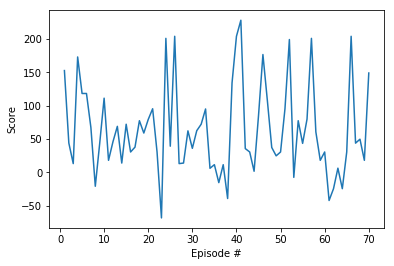

In [3]:
def ddpg(n_episodes=70, max_t=50):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        #agent.reset()

        score = 0
        for t in range(max_t):
            #print(t,len(env.StateBuffer),state,score)
            action = agent.act(state,True)
            #print(t,len(env.StateBuffer),state,score,action)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            #env.render()
            print(reward)
            if done:
                #print("done",done)
                break 
        #env.render()
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            agent.save_network('savedModels/', 'saved.h5')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            env.render()
        
        
        agent.save_network('savedModels/', 'saved.h5')
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

Successfully saved network.


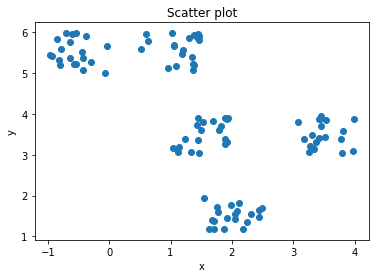

enter
cut reward 9.35275193763963
9.35275193763963
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))


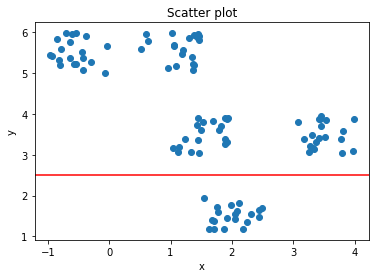

enter
-29.926763591531614
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))


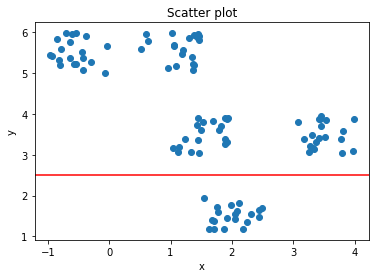

enter
cut reward -4.991775364436009
-4.991775364436009
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))


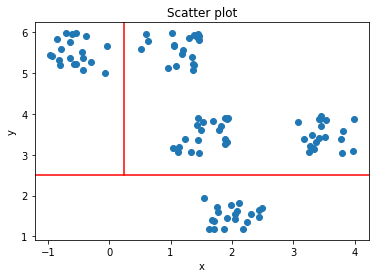

enter
cut reward 198.01492720400856
198.01492720400856
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))


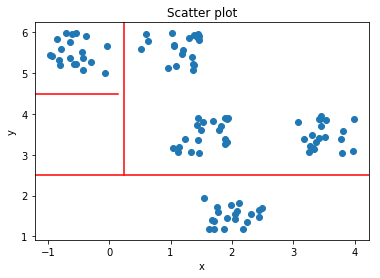

enter
-1
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))


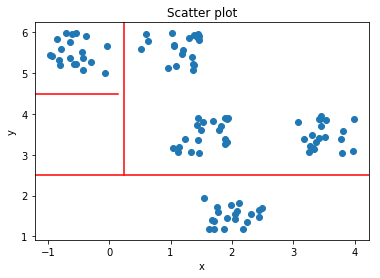

enter
-1
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))


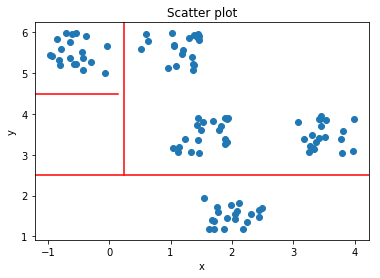

enter
cut reward 7.037647268109408
7.037647268109408
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 6.        ]]), action=array([0.19362779, 0.41899237, 0.38737984, 1.39580186]))


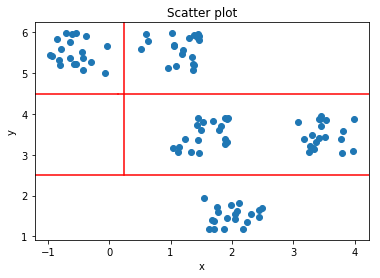

enter
cut reward 8.82960634208258
8.82960634208258
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 6.        ]]), action=array([0.19362779, 0.41899237, 0.38737984, 1.39580186]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968

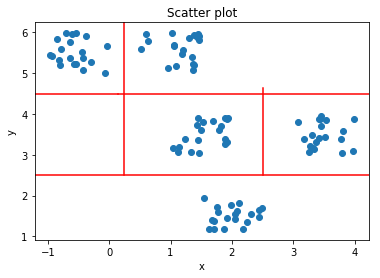

enter
-1
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 6.        ]]), action=array([0.19362779, 0.41899237, 0.38737984, 1.39580186]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 4.48950466]]), action=array([0.37278

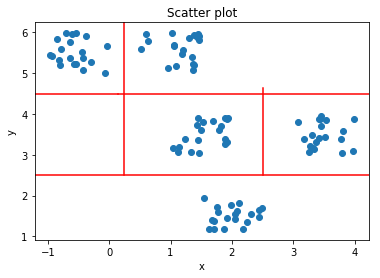

enter
-1
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 6.        ]]), action=array([0.19362779, 0.41899237, 0.38737984, 1.39580186]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 4.48950466]]), action=array([0.37278

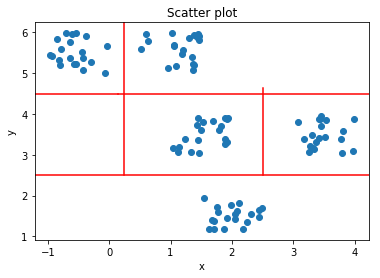

enter
cut reward -7.407897090707378
-7.407897090707378
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 6.        ]]), action=array([0.19362779, 0.41899237, 0.38737984, 1.39580186]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.

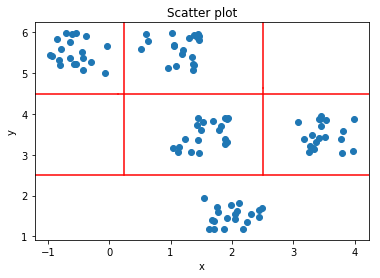

enter
-1
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([0.20861562, 0.47470808, 0.3166763 , 0.59873132]))
StateAction(state=array([[-1.       ,  4.       ],
       [ 2.4968283,  6.       ]]), action=array([0.41136593, 0.25595925, 0.33267482, 0.4955703 ]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  6.        ]]), action=array([0.34282066, 0.38982001, 0.26735933, 1.39580186]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 2.4968283 ,  4.48950466]]), action=array([0.25009976, 0.32274461, 0.42715562, 5.69012441]))
StateAction(state=array([[-1.        ,  0.23892574],
       [ 4.48950466,  6.        ]]), action=array([0.30592721, 0.27056489, 0.42350791, 5.8816526 ]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 6.        ]]), action=array([0.19362779, 0.41899237, 0.38737984, 1.39580186]))
StateAction(state=array([[0.23892574, 4.        ],
       [2.4968283 , 4.48950466]]), action=array([0.37278

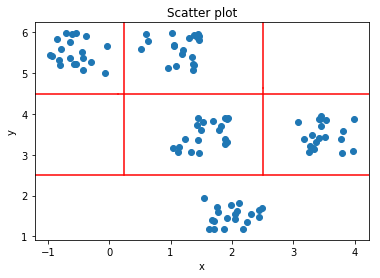

enter
-1
Simulation Over


In [4]:
agent.load_network('savedModels/', 'saved.h5')
state = env.reset()
   
while True:
    action = agent.act(state,False)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    print(reward)
    if done:
        break
        
env.close()

### 5. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  